# Section 1: Setup

In [16]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Section 2: Data Understanding

### Summary:
This repository analyzes pricing factors in neighborhoods of different social classes in São Paulo. Two clusters, representing peripheral and central areas, were examined. The study explores the influence of factors such as the number of bathrooms, unit price, and usable area on apartment prices. It provides insights for stakeholders to tailor their strategies and understand preferences based on location and social class.

### Key Questions Answered:

What role does location play in determining apartment prices?

How many variables like unit price, usable area, number of bedrooms, and number of suites do apartments in the outskirts have? How many do apartments in the central part have?

What factors are more influential in pricing apartments in central regions?






In [17]:
# Importing the database
df = pd.read_excel('/Users/joaosequeira/sao_paulo_apartments/sao_paulo_apartments/dados_wgs.xlsx')
df


,id,valor_total,unit,area_util,quartos,vagas,condominio,suites,banheiros,piscina,...,qtd_dados_bairro,media_idh,media_gini,expectativa_vida,renda_percapita,estacao_prox,linha_prox,dist,lat,lon
0,526,189900,5934.38,32,2,1,180.0,0,1,0,...,36.0,0.697182,0.410909,72.751818,559.668182,SÃO MATEUS,PRATA,6822.823684,-23.583879,-46.417548
1,734,221110,5142.09,43,2,1,250.0,0,1,0,...,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4682.709841,-23.543535,-46.425492
2,738,219990,5116.05,43,1,1,300.0,0,1,1,...,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123,-23.537339,-46.426823
3,753,219990,5116.05,43,2,1,300.0,0,1,1,...,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,4579.311123,-23.537339,-46.426823
4,924,220000,5365.85,41,2,1,300.0,0,1,1,...,36.0,0.697182,0.410909,72.751818,559.668182,CORINTHIANS-ITAQUERA,VERMELHA,3313.918703,-23.557799,-46.443523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2232,400000,6557.38,61,1,0,NaN,0,1,0,...,17.0,0.839667,0.510000,79.776667,1691.543333,REPÚBLICA,AMARELA,517.307020,-23.549233,-46.644282
2495,2233,688000,4712.33,146,2,1,600.0,1,3,0,...,17.0,0.839667,0.510000,79.776667,1691.543333,REPÚBLICA,AMARELA,452.950837,-23.548706,-46.643887
2496,2234,275000,6875.00,40,1,0,382.0,0,1,0,...,17.0,0.839667,0.510000,79.776667,1691.543333,REPÚBLICA,AMARELA,362.414001,-23.546804,-46.645963
2497,2240,329000,11750.00,28,1,0,350.0,1,1,0,...,17.0,0.839667,0.510000,79.776667,1691.543333,REPÚBLICA,AMARELA,394.364415,-23.546090,-46.646823


In [18]:
# Call the df.info() method to display the summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2499 non-null   int64  
 1   valor_total       2499 non-null   int64  
 2   unit              2499 non-null   float64
 3   area_util         2499 non-null   int64  
 4   quartos           2499 non-null   int64  
 5   vagas             2499 non-null   int64  
 6   condominio        2264 non-null   float64
 7   suites            2499 non-null   int64  
 8   banheiros         2499 non-null   int64  
 9   piscina           2499 non-null   int64  
 10  academia          2499 non-null   int64  
 11  quadra            2499 non-null   int64  
 12  endereco          2499 non-null   object 
 13  link              2499 non-null   object 
 14  bairro            2499 non-null   object 
 15  media_bairro      2492 non-null   float64
 16  qtd_dados_bairro  2492 non-null   float64


There are many columns that are not necessary for our analysis, so we will choose some of them to keep and discard the others. Additionally, we will translate the column fields into English since it will be the default language for the study.

In [19]:
# Selecting the columns that will be used in the analysis

treated_df_raw = df[['valor_total', 'unit', 'area_util', 'quartos', 'vagas',
       'condominio', 'suites', 'banheiros', 'piscina', 'academia', 'quadra',
       'media_idh', 'media_gini', 'expectativa_vida', 'renda_percapita',
        'dist', 'lat', 'lon']]


# translating to english

new_names = {'valor_total': 'total_value', 'unit': 'unit', 'area_util': 'area',
                     'quartos': 'bedrooms', 'vagas': 'parking_spaces',
                     'condominio': 'condominium', 'suites': 'suites',
                     'banheiros': 'bathrooms', 'piscina': 'pool',
                     'academia': 'gym', 'quadra': 'sports_court',
                     'media_idh': 'avg_hdi', 'media_gini': 'avg_gini',
                     'expectativa_vida': 'life_expectancy',
                     'renda_percapita': 'income_per_capita',
                     'dist': 'dist_to_subway', 'lat': 'lat', 'lon': 'lon'}

# Renaming the columns
treated_df = treated_df_raw.rename(columns=new_names)




To understand how the variables behave, we will plot some important columns using a violin plot and a correlation matrix.

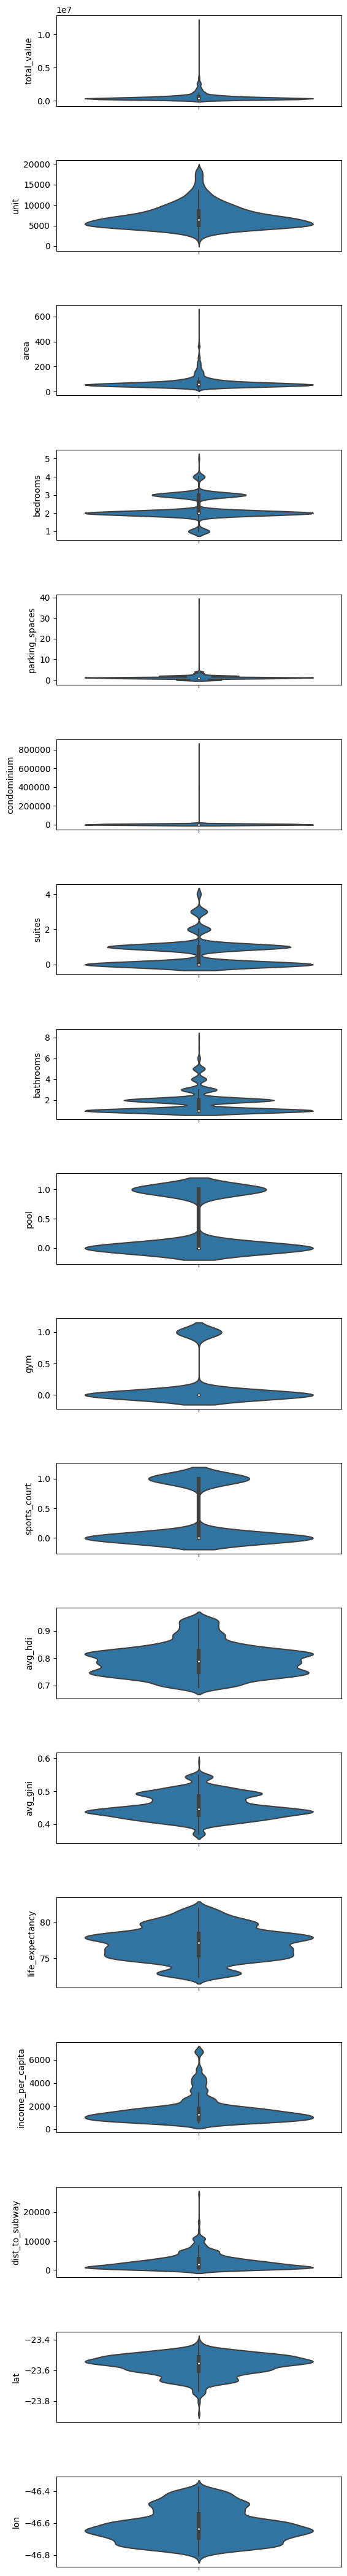

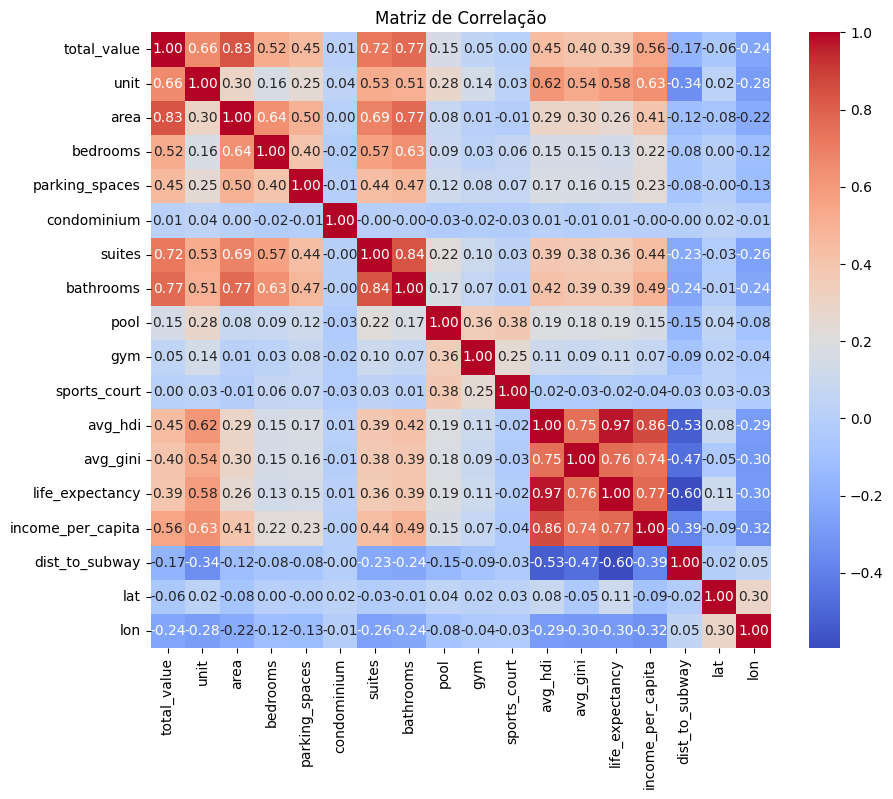

In [20]:
#  plot violin charts for each column of the DataFrame
num_cols = treated_df.select_dtypes(include=['float64', 'int64']).columns

# Chart config
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(6, len(num_cols)*3))
plt.subplots_adjust(hspace=0.6)

# Loop to plot violin
for i, col in enumerate(num_cols):
    ax = sns.violinplot(data=treated_df, y=col, ax=axes[i])
    ax.set_ylabel(col)

# Corr
corr_matrix = treated_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')

# Show charts
plt.show()

# Section 3: Data Preparation


To continue the analysis, we will check for null values in the dataframe that will be used.

In [21]:
# Verifying if the new dataframe have any NA values

treated_df.isnull().sum()

total_value            0
unit                   0
area                   0
bedrooms               0
parking_spaces         0
condominium          235
suites                 0
bathrooms              0
pool                   0
gym                    0
sports_court           0
avg_hdi                0
avg_gini               0
life_expectancy        0
income_per_capita      0
dist_to_subway         0
lat                    0
lon                    0
dtype: int64


Since there are null values, they will be treated. Considering that condominium fees are commonly associated with apartment properties in São Paulo, it is assumed that the missing values represent data flaws. Therefore, they will be treated by imputing the average overall value.

In [22]:
# Calculate the mean of the column that has NA values
condominio_mean = treated_df['condominium'].mean(skipna=True)

# Fill the NA values in the condominio column with the mean value
treated_df['condominium'].fillna(condominio_mean, inplace=True)

# Verifying if the new dataframe have any NA values
treated_df.isnull().sum()

total_value          0
unit                 0
area                 0
bedrooms             0
parking_spaces       0
condominium          0
suites               0
bathrooms            0
pool                 0
gym                  0
sports_court         0
avg_hdi              0
avg_gini             0
life_expectancy      0
income_per_capita    0
dist_to_subway       0
lat                  0
lon                  0
dtype: int64

# Section 4: Analysis / Modeling

To proceed, it will be necessary to cluster the apartments. For this purpose, we will use the silhouette score to determine the number of clusters.

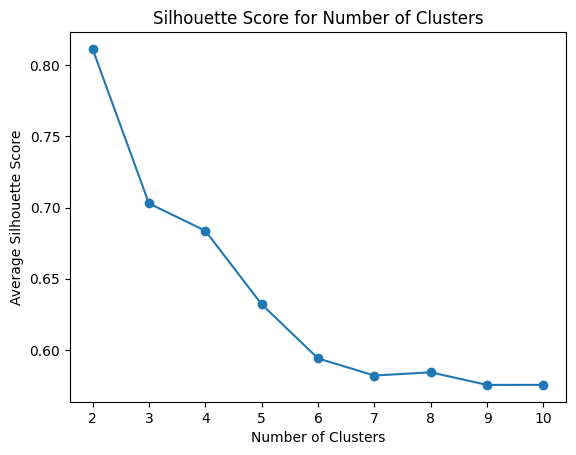

In [23]:

# Define a list of cluster numbers to test
num_clusters = range(2, 11)

# List to store the mean silhouette scores for each cluster number.
silhouette_scores = []

# Execute K-means for each cluster number and calculate the silhouette score.
for num in num_clusters:
    kmeans = KMeans(n_clusters=num, random_state=42)
    cluster_labels = kmeans.fit_predict(treated_df)
    silhouette_avg = silhouette_score(treated_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette graph.
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Number of Clusters')
plt.show()



The silhouette score suggests dividing the data into 2 clusters. Therefore, we will use the K-means algorithm to perform this separation.

In [24]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(treated_df)

#view cluster assignments for each observation
treated_df['cluster'] = kmeans.labels_


### QUESTION 2: What role does location play in determining apartment prices?

Next, we will plot the apartments on a map to visualize their distribution. As we can see, apartments located near the city center of São Paulo have a higher pricing, as the more expensive apartments are in cluster 0.

In [25]:
import plotly.express as px

# Definindo a escala de cores personalizada
colorscale = ['rgb(127, 0, 0)', 'rgb(0, 100, 0)']

# Plotando o gráfico do mapa com os apartamentos
fig = px.scatter_mapbox(treated_df, lat='lat', lon='lon', color='cluster', 
                        color_continuous_scale=colorscale, opacity=1)

# Configurando o estilo do mapa
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})

# Exibindo o gráfico
fig.show()



After defining the apartment clusters, it is necessary to visualize how they are distributed using histograms and box plots for each variable. For this purpose, the following functions have been created:

In [26]:
def create_cluster_histogram(variable, df=treated_df, cluster_column='cluster'):
    """
    Create a histogram for each cluster based on a given variable.

    Args:
        variable (str): The variable for which the histogram will be created.
        df (pandas.DataFrame, optional): The DataFrame containing the data. Defaults to treated_df.
        cluster_column (str, optional): The column representing the clusters. Defaults to 'cluster'.

    Returns:
        None: Displays the histogram plot.

    """
    import plotly.express as px

    # Create a histogram for each cluster
    fig = px.histogram(df, x=variable, color=cluster_column)

    # Configure the layout
    fig.update_layout(
        title=f'Histogram by Cluster - {variable}',
        xaxis_title=variable,
        yaxis_title='Count',
        barmode='overlay',
        bargap=0.1
    )

    fig.update_traces(text=fig.data[0].y, textposition='auto')

    # Display the plot
    fig.show()


In [27]:
def create_cluster_boxplot(variable, df=treated_df, cluster_column='cluster'):
    """
    Create a boxplot for each cluster based on a given variable.

    Args:
        variable (str): The variable for which the boxplot will be created.
        df (pandas.DataFrame, optional): The DataFrame containing the data. Defaults to treated_df.
        cluster_column (str, optional): The column representing the clusters. Defaults to 'cluster'.

    Returns:
        None: Displays the boxplot.

    """
    import plotly.express as px

    fig = px.box(df, x=cluster_column, y=variable)

    # Display the plot
    fig.show()

### QUESTION 3: How many variables like unit price, usable area, number of bedrooms, and number of suites do apartments in the outskirts have? How many do apartments in the central part have?

After that, a function will be created to plot the selected fields from the list, allowing for cluster analysis.

In [28]:

# Selecting the columns that will be plotted

chart_list = ['total_value', 'unit', 'area', 'bedrooms',
       'suites', 'bathrooms', 'avg_hdi', 'avg_gini', 'life_expectancy', 'income_per_capita']


def create_multiple_cluster_boxplots(chart_list):
    """
    Create multiple cluster boxplots for a list of variables.

    Args:
        chart_list (list): List of variables for which cluster boxplots will be created.

    Returns:
        None: Displays the cluster boxplot for each variable.

    """
    for variable in chart_list:
        create_cluster_boxplot(variable)




As we can see, there is a significant discrepancy in the number of suites, bedrooms, usable area, unit price, life expectancy, and per capita income between the two clusters. It is evident that those in cluster zero have a significantly better quality of life compared to those living in the outskirts.

In [29]:
create_multiple_cluster_boxplots(chart_list)

### QUESTION 2: How do the pricing factors differ between peripheral and central areas?

To conclude, a function will be created to determine the importance of each feature in the pricing of apartments in each cluster.

In [30]:
def analyze_feature_importance_by_cluster(treated_df):
    """
    Perform feature importance analysis for each cluster in the treated DataFrame.

    Args:
        treated_df (pandas.DataFrame): The DataFrame containing the treated data.

    Returns:
        None: Displays feature importance plots for each cluster.

    """
    import xgboost as xgb
    import matplotlib.pyplot as plt

    # Get unique clusters from the 'cluster' column
    clusters = treated_df['cluster'].unique()

    # Execute feature importance analysis for each cluster
    for cluster in clusters:
        # Filter the data for the current cluster
        cluster_data = treated_df[treated_df['cluster'] == cluster]

        # Define the independent and dependent variables
        X = cluster_data.drop(['total_value', 'cluster'], axis=1)
        y = cluster_data['total_value']

        # Create the XGBoost model
        model = xgb.XGBRegressor()

        # Train the model
        model.fit(X, y)

        # Obtain the feature importances
        feature_importance = model.feature_importances_
        feature_names = X.columns

        # Plot the feature importances
        plt.figure(figsize=(8, 6))
        plt.bar(feature_names, feature_importance)
        plt.title(f'Feature Importance - Cluster {cluster}')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(rotation=90)
        plt.show()



In conclusion, based on the analysis of Cluster 1 and Cluster 0, we can observe distinct factors that influence the pricing of apartments in different areas of São Paulo.

For Cluster 1, representing apartments located further away from the city center, the number of bathrooms emerges as the predominant factor in determining apartment prices. This suggests that buyers or tenants in these peripheral areas value apartments with a greater number of bathrooms, possibly indicating a preference for larger, more functional living spaces.

On the other hand, for Cluster 0, which comprises apartments closer to the central region, the number of bathrooms is not as influential. Instead, the unit price and usable area play a more significant role in pricing. Higher unit prices and larger usable areas are associated with apartments in desirable locations and with luxurious features, reflecting the premium value attributed to these properties.

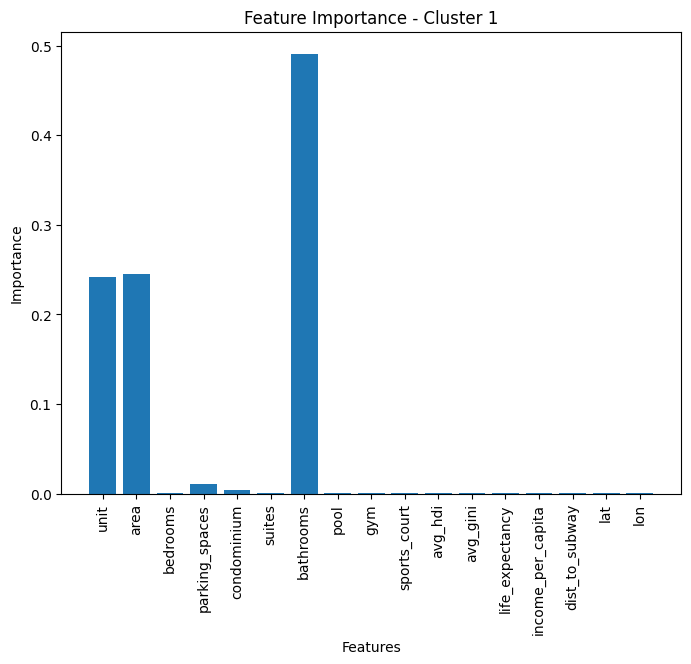

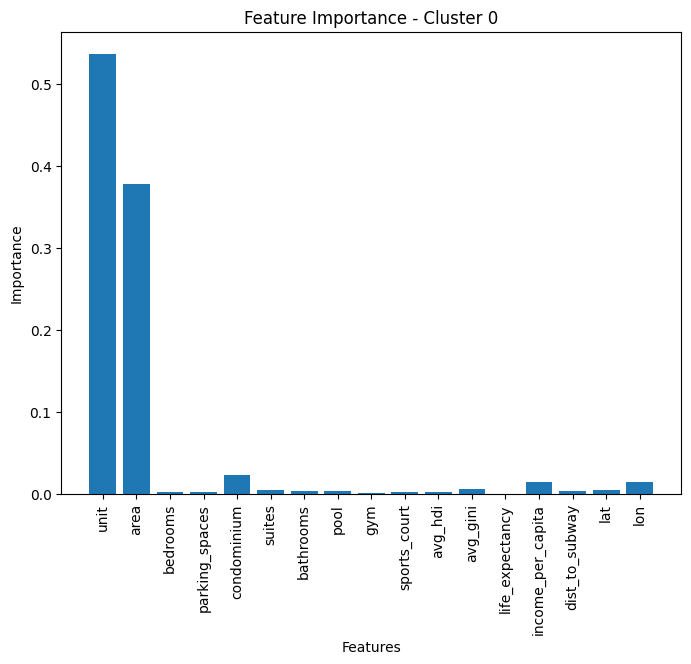

In [31]:
analyze_feature_importance_by_cluster(treated_df)